In [338]:
import numpy as np
import matplotlib.pyplot as plt

##### Below is a generalised model of simple_model.ipynb, allowing for any number of segments.
This model has a few assumptions:
* 1D model, each segment can only transfer heat to neighbouring segments
* There is a heat source which supplies (or draws) heat from segment 0, the magnitude of which is set by Q_in
* The final segment may disspiate heat to surroundings. The outside temperature is set by T_out.

In [339]:
class system():
    def __init__(self, k, c, T, T_out, Q_in):
        """
        Initialise class and set system parameters

        Parameters
        ----------
        k : list of floats
            Thermal conductivity of segments
        c : list of floats
            Heat capacity of segments
        T : list of floats
            Initial temperature of segments
        T_out : float
            Outside temperature (Celcius)
        Q_in : float
             Heat supply to segment 0 (Watts)
        """
        self.k = np.array(k) # Thermal conductivity of segments
        self.c = np.array(c) # Heat capacity of segments
        self.T = np.array(T) # Temperatures of segments
        
        n = len(self.T)
        self.n_seg = n # Number of segments
        
        assert (len(self.k) == n) & (len(self.c) == n), 'input parameter shape mismatch'
        
        self.T_out = T_out
        self.Q_in = Q_in
        
    def update(self, timestep):
        """
        Calculate heat flux between segments and update temperatures

        Parameters
        ----------
        timestep : float
            Time interval between iterations
        """
#         heat_flux = np.diff(np.insert(self.T, 0, self.T_out))*self.c # Swap this with code below to swap positions of Q_in and T_out
#         heat_flux = np.append(heat_flux, self.Q_in)
        
        heat_flux = np.diff(np.append(self.T, self.T_out))*self.c
        heat_flux = np.insert(heat_flux, 0, -self.Q_in)
        net_heat_flux = np.diff(heat_flux)
        
        self.T += (net_heat_flux * timestep) / self.k
        
    def run(self, iterations, timestep, plot=True):
        """
        Run simulation for given number of iterations with given timestep

        Parameters
        ----------
        iterations : int
            number of iterations to run the simulation
        
        timestep : float
            time interval between each iteration
        
        plot : bool, default = True
            Set to False to omit plot

        Returns
        -------
        Ts : ndarray, shape (number of iterations, number of segments)
            numpy array of temperatures for each segment, for each timestep
        """
        Ts = np.empty(shape=(iterations, self.n_seg))
        for i in range(iterations):
            sys.update(timestep)
            Ts[i] = sys.T
        
        if plot:
            
            time = np.linspace(0,iterations*timestep/(3600*24),iterations, endpoint=False)
            fig, ax = plt.subplots(1,1, figsize=(10,5))
            for i, T in enumerate(Ts.T):
                ax.plot(time, T, label=str(i))
            ax.set(xlabel='Time (days)', ylabel='Temperature (C)')
            ax.legend()
            
        return Ts

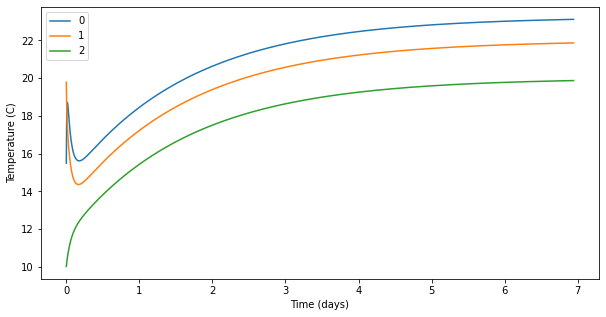

In [340]:
k = [6e5, 2.5e6, 1.1e7]
c = [800.0, 500.0, 100.0]
T = [15.0, 20.0, 10.0]
T_out = 10
heatinput = 1000
# Initialise class with system parameters
sys = system(k, c, T, T_out, heatinput)

# Run simulation. This recreates simple_model.ipynb showing that our generalised model works.
Ts = sys.run(iterations=10000, timestep=60)

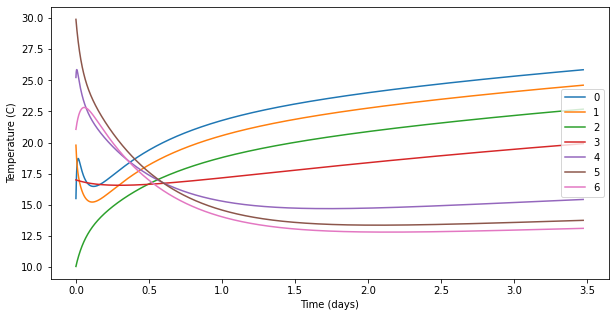

In [341]:
# More complex example, 7 segments in series
k = [6e5, 2.5e6, 1.1e7, 1.5e7, 2.1e5, 6.5e6, 6.9e6]
c = [800.0, 500.0, 300.0, 150.0, 400.0, 1000.0, 200.0]
T = [15.0, 20.0, 10.0, 17.0, 25.0, 30.0, 21.0]
T_out = 10
heatinput = 1000
# Initialise class with system parameters
sys = system(k, c, T, T_out, heatinput)

# Run simulation. This recreates simple_model.ipynb showing that our generalised model works.
Ts = sys.run(iterations=5000, timestep=60)